In [4]:
import pandas as pd
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [2]:
df2 = pd.read_csv("/Users/user/PycharmProjects/Drug Design FInal/FINAL_GIT/Raw Files/merged_features_IC50_g12c.csv")
df2

In [5]:
import numpy as np
import pandas as pd
def pIC50(input):
    pIC50 = []

    input["IC50 (nM)"] = pd.to_numeric(input["IC50 (nM)"],errors='coerce')

    for i in input["IC50 (nM)"]:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input["pIC50"]

    return x

In [6]:
filename = "/Users/user/PycharmProjects/Drug Design FInal/FINAL_GIT/Raw Files/merged_features_IC50_g12c.csv"
#df = pd.read_csv("fda_original.csv",sep=";")
df2 = pd.read_csv(filename)
df2.dropna(subset=['IC50 (nM)'], inplace=True)
df2['IC50 (nM)'] = pIC50(df2)
df2['IC50 (nM)'] = df2['pIC50']  # Replace 'SV' column with pIC50 values

# Drop 'pIC50' column (optional) as it's now redundant
df2.drop(columns=['pIC50'], inplace=True)

df2

,ChEMBL ID,Smiles,FC,N,H,Cl,Br,I,P,F,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,IC50 (nM)
0,1396159,CN1CCC[C@H]1COc1nc(N2CCN([C@@H](CC#N)C2)C(=O)C...,0,308,34,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,9.309804
1,1396154,Fc1c(ncc2c(nc(OCC3(CN4CCCC4)CC3)nc12)N1CCN([C@...,0,336,35,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.229148
2,1396157,F[C@H]1CN2CCC[C@@]2(COc2nc(N3CCN([C@@H](CC#N)C...,0,330,34,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,9.229148
3,1396156,F[C@H]1CN2CCC[C@@]2(COc2nc(N3CCN([C@@H](CC#N)C...,0,322,35,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,9.148742
4,1396158,CN1CCC[C@H]1COc1nc(N2CCN([C@@H](CC#N)C2)C(=O)C...,0,300,35,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.148742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,1252347,CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...,0,530,72,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.259637
1166,1252348,CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...,0,498,65,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.259637
1167,1252349,CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...,0,498,65,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.259637
1168,1252352,CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...,0,498,68,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.259637


In [ ]:
import numpy as np
import pandas as pd
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression
from sklearn.inspection import permutation_importance

# --- Load Data ---
df2.dropna(subset=['IC50 (nM)'], inplace=True)
X = df2.drop(columns=['IC50 (nM)', 'Smiles', 'ChEMBL ID'])
y = df2['IC50 (nM)']

# --- Initialize Pipeline ---
pipe = Pipeline([
    ('variance_threshold', VarianceThreshold(threshold=0.8*(1-0.8))),
    ('univariate_select', SelectKBest(score_func=f_regression, k=50)),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(max_depth=20, min_samples_leaf=10, random_state=42))
])

# --- Load New Data ---
new_descriptors = pd.read_csv('/Users/user/PycharmProjects/Drug Design FInal/FINAL_GIT/Raw Files/FDA_Hyb_Features.csv')
new_descriptors.dropna(inplace=True)
chembl_id_column = new_descriptors['ChEMBL ID']
smiles_column = new_descriptors['Smiles']
X_new = new_descriptors.drop(columns=['ChEMBL ID', 'Smiles'])

# --- Align New Data with Training Features ---
missing_cols = set(X.columns) - set(X_new.columns)
for col in missing_cols:
    X_new[col] = 0  # Add missing columns with 0
X_new = X_new[X.columns]  # Ensure column order matches

# --- Track Results ---
loop_results_df = pd.DataFrame(columns=['ChEMBL ID', 'Smiles', 'Predicted Value'])
predicted_values = {chembl_id: [] for chembl_id in chembl_id_column.unique()}
feature_importances = []
perm_importances = []
all_selected_features = []

# --- Main Loop ---
for i in range(50):  # 50 iterations
    pipe.fit(X, y)
    
    # Get selected features for this iteration
    vt_mask = pipe.named_steps['variance_threshold'].get_support()
    remaining_features = X.columns[vt_mask].tolist()
    skb_mask = pipe.named_steps['univariate_select'].get_support()
    selected_features = [remaining_features[i] for i in range(len(remaining_features)) if skb_mask[i]]
    all_selected_features.append(selected_features)
    
    # Predict
    loop_predicted_values = pipe.predict(X_new)
    
    # Store predictions
    loop_df = pd.DataFrame({
        'ChEMBL ID': chembl_id_column,
        'Smiles': smiles_column,
        'Predicted Value': loop_predicted_values
    }).sort_values('Predicted Value', ascending=False)
    
    loop_results_df = pd.concat([loop_results_df, loop_df.head(10)])
    
    # Store predicted values per ChEMBL ID
    for chembl_id, pred in zip(chembl_id_column, loop_predicted_values):
        predicted_values[chembl_id].append(pred)
    
    # Get feature importances (only for selected features)
    rf_model = pipe.named_steps['model']
    feature_importances.append(rf_model.feature_importances_)
    
    # Get permutation importance (on selected features)
    X_transformed = pipe[:-1].transform(X)  # Apply all steps except model
    result = permutation_importance(
        pipe.named_steps['model'], 
        X_transformed, 
        y, 
        n_repeats=10, 
        random_state=42
    )
    perm_importances.append(result.importances_mean)

# --- Post-Processing ---
# Average importances (only for selected features)
avg_feature_importance = np.mean(feature_importances, axis=0)
avg_perm_importance = np.mean(perm_importances, axis=0)

# Create importance DataFrames
feature_df = pd.DataFrame({
    'Feature': selected_features,  # Use the last iteration's selected features
    'Importance': avg_feature_importance
}).sort_values('Importance', ascending=False)

perm_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': avg_perm_importance
}).sort_values('Importance', ascending=False)

# --- Analyze Top Predictions ---
value_counts = loop_results_df['ChEMBL ID'].value_counts(normalize=True) * 10
top_10_chembl_ids = value_counts.head(10).index

/var/folders/j6/_f4gqc7j33nb2dzqnzm9w2w00000gn/T/ipykernel_5182/588334143.py:64: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  loop_results_df = pd.concat([loop_results_df, loop_df.head(10)])


<Figure size 1200x800 with 0 Axes>

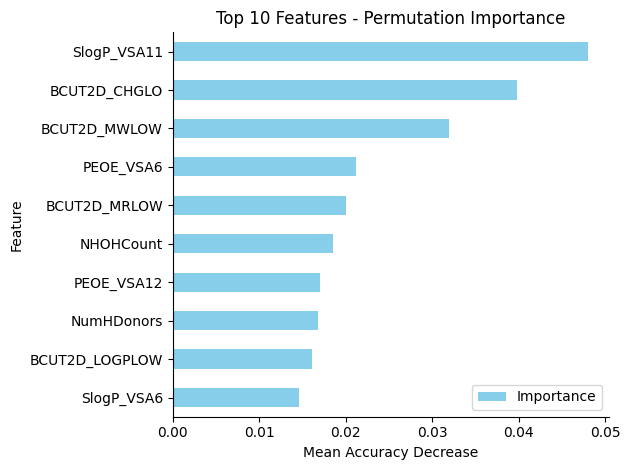

In [8]:
# Plot Permutation Importance
plt.figure(figsize=(12, 8))
perm_df.head(10).sort_values('Importance', ascending=True).plot.barh(
    x='Feature', y='Importance', color='skyblue'
)
plt.title('Top 10 Features - Permutation Importance')
plt.xlabel('Mean Accuracy Decrease')
plt.gca().spines[['right', 'top']].set_visible(False)
plt.tight_layout()
plt.savefig('permutation_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
mean_values = {chembl_id: np.mean(predicted_values[chembl_id]) for chembl_id in top_10_chembl_ids}
std_dev_values = {chembl_id: np.std(predicted_values[chembl_id]) for chembl_id in top_10_chembl_ids}

summary_df = pd.DataFrame({
    'ChEMBL ID': top_10_chembl_ids,
    'Frequency': [value_counts[chembl_id] for chembl_id in top_10_chembl_ids],
    'Avg Predicted Value': [mean_values[chembl_id] for chembl_id in top_10_chembl_ids]
})

summary_df.head(10)
summary_df.to_csv("RF_molecules_Newfeatures_G12C.csv", index=False)